In [78]:
import numpy as np
from Experiment import *

In [93]:
data = np.load("raw_datas/exp2.npz")
dfs = data['dfs']
# print(dfs[0])
# n = 100
# Hs = range(int(n / 5), n + 10, 10)
# dfs_ = [pd.DataFrame(item, columns=["Init Spectral", "Likelihood Improvement"]).assign(param=Hs[i]) for i, item in enumerate(dfs)]
# plot(dfs_, 1, "testing")

In [94]:
def reject_outliers(data, m=3):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [98]:
def plot_final_discrete(final_means, final_stds, xs, title, xlabel, legends, fname):
    fig, ax = plt.subplots()
    clrs = sns.color_palette("husl", len(legends))

    with sns.axes_style("darkgrid"):
        for i, color in enumerate(clrs):
            stds = [[final_means[i][j] if final_means[i][j] - final_stds[i][j] < 0 else final_stds[i][j], 0.5 - final_means[i][j] if final_means[i][j] + final_stds[i][j] > 0.5 else final_stds[i][j]] for j in range(len(final_means[i]))]
            stds = np.array(stds).T
            ax.errorbar(xs, final_means[i], yerr=stds, fmt='o', linestyle='dashed', capsize=3,
                        label=legends[i], c=color)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig("exp1", dpi=600, bbox_inches='tight')
    # plt.show()
    plt.close()

In [99]:
mean_1, mean_2 = [], []
std_1, std_2 = [], []
inits, finals = [], []

for T in range(dfs.shape[0]):
    init = reject_outliers(dfs[T][:,0])
    final = reject_outliers(dfs[T][:,1])
    # init = dfs[T][:,0]
    # final = dfs[T][:,1]

    inits.append(init)
    finals.append(final)

    mean_1.append(np.mean(init))
    mean_2.append(np.mean(final))

    std_1.append(np.std(init))
    std_2.append(np.std(final))

mean_1 = np.array(mean_1)
mean_2 = np.array(mean_2)
std_1 = np.array(std_1)
std_2 = np.array(std_2)

for T in range(dfs.shape[0]):
    print(f"{mean_2[T]} &", end=" ")

means = [mean_1, mean_2]
stds = [std_1, std_2]

0.40149 & 0.22605 & 0.0856 & 0.001023706896551724 & 0.00014830508474576273 & 9.483667017913594e-05 & 1.0537407797681771e-05 & 0.0 & 0.0 & 

In [100]:
plot_final_discrete(means, stds, range(20,110,10), "Varying H (n=100, T=20, eps=0.3)", "H", ["init clustering", "init clustering + likelihood improvement"], None)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


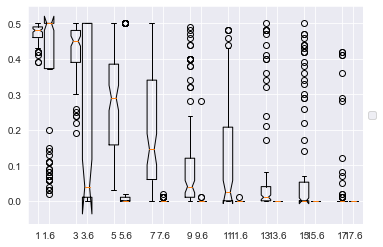

In [77]:
fig, ax = plt.subplots()
# clrs = sns.color_palette("husl", len(["init clustering", "init clustering + likelihood improvement"]))

# with sns.axes_style("darkgrid"):
ax.boxplot(inits, notch=True, whis=1.1, positions=range(1,19,2))
ax.boxplot(finals, notch=True, whis=1.1, positions=[i+0.6 for i in range(1,19,2)])
    # ax.boxplot(finals, notch=True, whis=1.1, positions=[i+0.25 for i in range(1,10,1)])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(fname, dpi=1200, bbox_inches='tight')
plt.show()
plt.close()